# Logistic Regression

1. What is Logistic Regression, and how does it differ from Linear Regression.

- Logistic Regression is a statistical model used for binary classification tasks. Unlike Linear Regression, which predicts a continuous output, Logistic Regression predicts the probability of an instance belonging to a particular category (usually represented as 0 or 1).

2. What is the mathematical equation of Logistic Regression.



3. Why do we use the Sigmoid function in Logistic Regression.

Squashes linear output to probability between 0 and 1, introduces non-linearity, is differentiable for optimization, and allows probabilistic interpretation.

4. What is the cost function of Logistic Regression.


5. What is Regularization in Logistic Regression? Why is it needed.

Regularization: Adds penalty term to cost function to prevent overfitting by discouraging large coefficients. Needed for better generalization on unseen data and handling multicollinearity.

6. Explain the difference between Lasso, Ridge, and Elastic Net regression.

Ridge (L2): Adds squared magnitude of coefficients to the penalty, shrinks coefficients towards zero. Lasso (L1): Adds absolute magnitude, can drive coefficients to zero (feature selection). Elastic Net: Combines L1 and L2 penalties.

7. When should we use Elastic Net instead of Lasso or Ridge.

When suspecting many relevant but potentially redundant features or groups of correlated features, aiming for a balance of shrinkage and feature selection.

8. What is the impact of the regularization parameter (λ) in Logistic Regression.

Controls regularization strength. Large λ: strong penalty, smaller coefficients, less overfitting (potential underfitting). Small λ: weak penalty, larger coefficients, more overfitting (less bias).

9. What are the key assumptions of Logistic Regression.

Linearity of log-odds, independence of observations, no/little multicollinearity, sufficiently large sample size, correct model specification.

10. What are some alternatives to Logistic Regression for classification tasks.

SVM, Decision Trees, Random Forests, Gradient Boosting Machines, KNN, Naive Bayes, Neural Networks.

11. What are Classification Evaluation Metrics.

Accuracy, Precision, Recall, F1-Score, AUC-ROC, Confusion Matrix, Log Loss, Classification Report – used to assess model performance.

12. How does class imbalance affect Logistic Regression.

Biases model towards majority class, leads to poor performance on minority class, misleading accuracy.

13. What is Hyperparameter Tuning in Logistic Regression.

Finding optimal hyperparameter values (e.g., regularization strength, solver) using techniques like Grid Search and Cross-Validation to maximize performance.

14. What are different solvers in Logistic Regression? Which one should be used.

'liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga' – optimization algorithms. Choice depends on dataset size, regularization type, and speed requirements.

15. How is Logistic Regression extended for multiclass classification.

One-vs-Rest (OvR): Trains binary classifiers for each class. Softmax Regression: Direct generalization using softmax function for probability distribution over classes.

16. What are the advantages and disadvantages of Logistic Regression.

Advantages: Interpretable, efficient, well-understood, probabilistic output, regularizable. Disadvantages: Assumes linearity of log-odds, limited to linear boundaries, sensitive to outliers, potentially suboptimal for complex data, multicollinearity issues.

17. What are some use cases of Logistic Regression.

Medical diagnosis, spam detection, credit risk assessment, churn prediction, marketing, sentiment analysis, fraud detection.

18. What is the difference between Softmax Regression and Logistic Regression.

Logistic Regression: Binary classification. Softmax Regression: Multiclass classification, generalizes Logistic Regression using the softmax function.

19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification.

Depends on interpretability needs, computational efficiency, class separability, implementation, and empirical performance. Softmax often preferred for inherent multiclass problems.

20. How do we interpret coefficients in Logistic Regression?

# Practical Questions

In [ ]:
# 1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris  # Using iris for demonstration

def logistic_regression_analysis(X, y):
    """
    Loads a dataset, splits it into training and testing sets,
    applies Logistic Regression, and prints the model accuracy.

    Args:
        X: Input features (numpy array or pandas DataFrame).
        y: Target variable (numpy array or pandas Series).
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Logistic Regression model
    model = LogisticRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy
    print("Logistic Regression Model Accuracy:", accuracy)

    return accuracy #returning the accuracy

if __name__ == "__main__":

    iris = load_iris()
    X = iris.data
    y = iris.target

    logistic_regression_analysis(X, y)


Logistic Regression Model Accuracy: 1.0


In [ ]:
# 2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy

import pandas as pd

try:
    df = pd.read_csv('iris.csv')
    display(df.head())
except FileNotFoundError:
    df = None # Set df to None to indicate failure

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
import numpy as np

# Convert y_train and y_test back to 1D arrays
y_train = np.argmax(y_train.values, axis=1)
y_test = np.argmax(y_test.values, axis=1)

# Initialize and train the model again
l1_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
l1_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred = l1_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of L1 regularized Logistic Regression: {accuracy}")

Accuracy of L1 regularized Logistic Regression: 1.0


In [ ]:
# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients

import pandas as pd

try:
    df = pd.read_csv('iris.csv')
    display(df.head())
except FileNotFoundError:
    df = None

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('variety', axis=1)
y = df['variety']

# Encode the target variable using Label Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with L2 penalty
logreg_model = LogisticRegression(penalty='l2')

# Train the model
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the Logistic Regression model: {accuracy}")

Accuracy of the Logistic Regression model: 1.0


In [ ]:
# Print the coefficients of the trained model
print("Coefficients of the Logistic Regression model:")
for i, coef in enumerate(logreg_model.coef_):
    print(f"Class {le.inverse_transform([i])[0]}:")
    for j, feature in enumerate(X.columns):
        print(f"  {feature}: {coef[j]}")

Coefficients of the Logistic Regression model:
Class Setosa:
  sepal.length: -1.0210258914161339
  sepal.width: 1.1315509033368594
  petal.length: -1.8147168196708003
  petal.width: -1.6876310332512838
Class Versicolor:
  sepal.length: 0.5343955888894718
  sepal.width: -0.28357111638007604
  petal.length: -0.34273212970206646
  petal.width: -0.7310335142409315
Class Virginica:
  sepal.length: 0.4866303025266627
  sepal.width: -0.8479797869567823
  petal.length: 2.157448949372868
  petal.width: 2.418664547492217


In [ ]:
# 4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')C

import pandas as pd

try:
    df = pd.read_csv('iris.csv')
    display(df.head())
except FileNotFoundError:


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Shape of the DataFrame: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Data Types:
 None

Descriptive Statistics:
        sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.10000

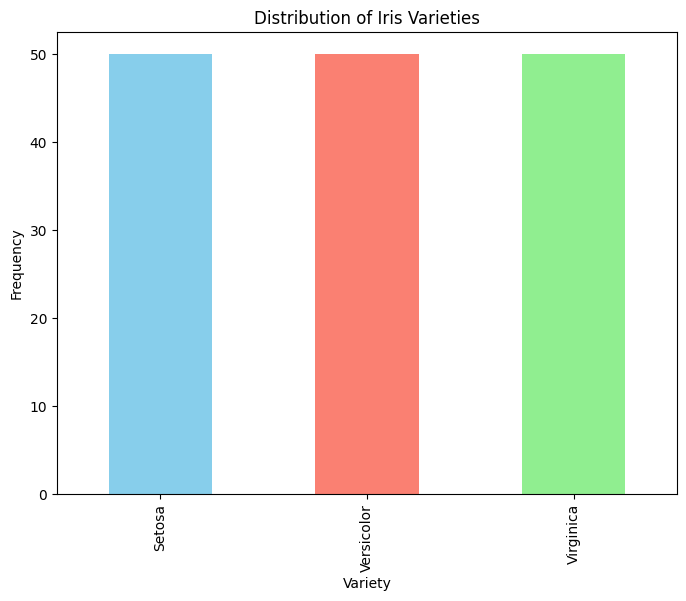

In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display data types of each column
print("\nData Types:\n", df.info())

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values per column:\n", df.isnull().sum())

# Examine the distribution of the target variable
print("\nTarget Variable Distribution:\n", df['variety'].value_counts())

import matplotlib.pyplot as plt
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
df['variety'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Iris Varieties')
plt.xlabel('Variety')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

Accuracy of the Logistic Regression model: 1.0


In [ ]:
# 5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'

import pandas as pd

try:
    df_iris = pd.read_csv('iris.csv')
    display(df_iris.head())
except FileNotFoundError:
    print("Error: 'iris.csv' not found. Please ensure the file exists in the current directory.")
    df_iris = None # Indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse 'iris.csv'. Please check the file format.")
    df_iris = None # Indicate failure
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_iris = None

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df_iris.shape)

# Get a summary of the DataFrame
print("\nInfo:")
display(df_iris.info())

# Generate descriptive statistics for numerical features
print("\nDescriptive Statistics:")
display(df_iris.describe())

# Examine the unique values of the target variable
print("\nUnique values of 'variety':")
print(df_iris['variety'].unique())
print("\nValue counts of 'variety':")
print(df_iris['variety'].value_counts())

# Check for duplicate rows
duplicate_rows = df_iris.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

Shape of the DataFrame: (150, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None


Descriptive Statistics:


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Unique values of 'variety':
['Setosa' 'Versicolor' 'Virginica']

Value counts of 'variety':
variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

Number of duplicate rows: 1


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Separate features (X) and target (y)
X = df_iris.drop('variety', axis=1)
y = df_iris['variety']

# 2. Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Remove duplicate rows
# Find the index of the duplicate row
duplicate_index = df_iris[df_iris.duplicated()].index[0]

# Drop the duplicate row
X = X.drop(duplicate_index)
y_encoded = np.delete(y_encoded, duplicate_index)


# 4. Verify the changes
print("Unique values of y_encoded:", np.unique(y_encoded))
print("Shape of X:", X.shape)
print("Shape of y_encoded:", y_encoded.shape)

Unique values of y_encoded: [0 1 2]
Shape of X: (149, 4)
Shape of y_encoded: (149,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (119, 4)
Shape of X_test: (30, 4)
Shape of y_train: (119,)
Shape of y_test: (30,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with multi_class='ovr'
logreg_model = LogisticRegression(multi_class='ovr', random_state=42)

# Train the model using the training data
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', random_state=42)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Use OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(logreg_model)

# Train the model
ovr_classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(random_state=42))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = ovr_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:\n{cm}")

# Generate classification report
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9666666666666667

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
 # 6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
Regression. Print the best parameters and accuracy

import pandas as pd

try:
    df_iris = pd.read_csv('iris.csv')
    display(df_iris.head())
except FileNotFoundError:
    print("Error: 'iris.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df_iris = None # Set df_iris to None to indicate failure


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(solver='liblinear')

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Store the trained GridSearchCV object
trained_grid_search = grid_search

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model with increased max_iter
logreg = LogisticRegression(solver='liblinear', max_iter=1000)

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5)

try:
    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Store the trained GridSearchCV object
    trained_grid_search = grid_search

except Exception as e:
    print(f"An error occurred during model training: {e}")
    trained_grid_search = None

In [ ]:
print("Best hyperparameters:", trained_grid_search.best_params_)
y_pred = trained_grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best hyperparameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 1.0


In [ ]:
# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy

import pandas as pd

try:
    df = pd.read_csv('iris.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'iris.csv' not found. Please ensure the file exists in the current directory.")


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


(150, 5)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target variable (y)
X = df.drop('variety', axis=1)
y = df['variety']

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y = le.fit_transform(y)

# Store the mapping between original categories and numerical labels
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Class Mapping: {class_mapping}")

# Verify shapes
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Examine first few rows of X and elements of y
display(X.head())
print(y[:5])

Class Mapping: {'Setosa': np.int64(0), 'Versicolor': np.int64(1), 'Virginica': np.int64(2)}
Shape of X: (150, 4)
Shape of y: (150,)


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


[0 0 0 0 0]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified k-fold cross-validation
accuracy_scores = []
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Train the model
    logreg.fit(X_train, y_train)

    # Make predictions
    y_pred = logreg.predict(X_val)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average accuracy: {avg_accuracy}")

Average accuracy: 0.9666666666666668


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

import pandas as pd

try:
    df_iris = pd.read_csv('iris.csv')
    display(df_iris.head())
    print(df_iris.shape)
except FileNotFoundError:
    df_iris = None

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


(150, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Missing values per column:
 sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Target variable distribution:
 variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


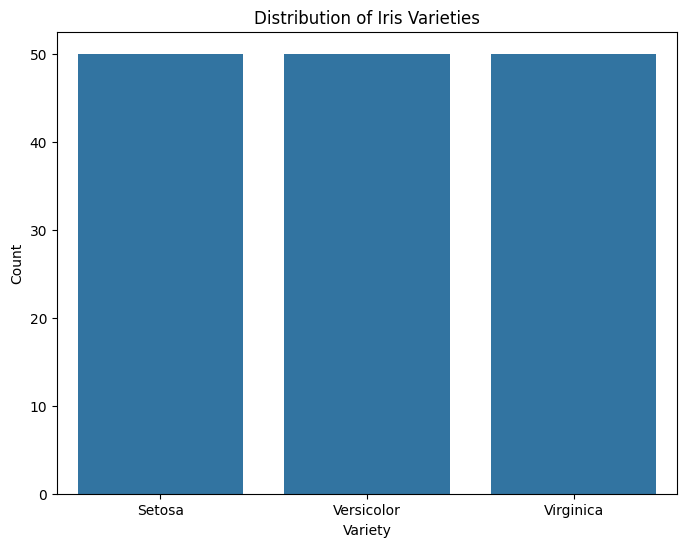

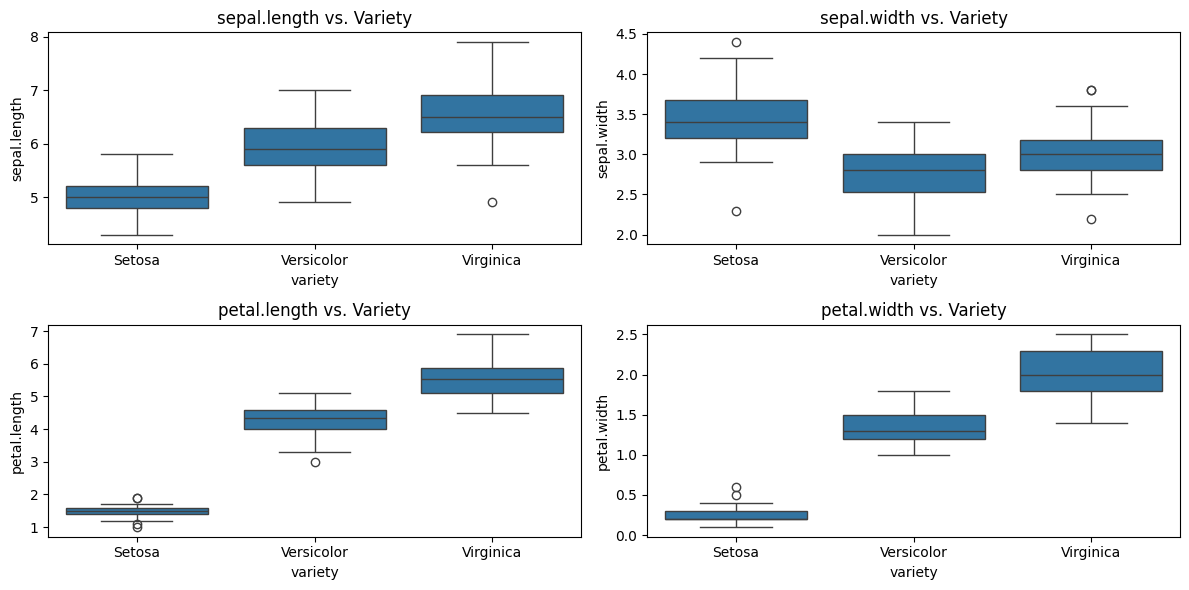

<Figure size 1000x800 with 0 Axes>

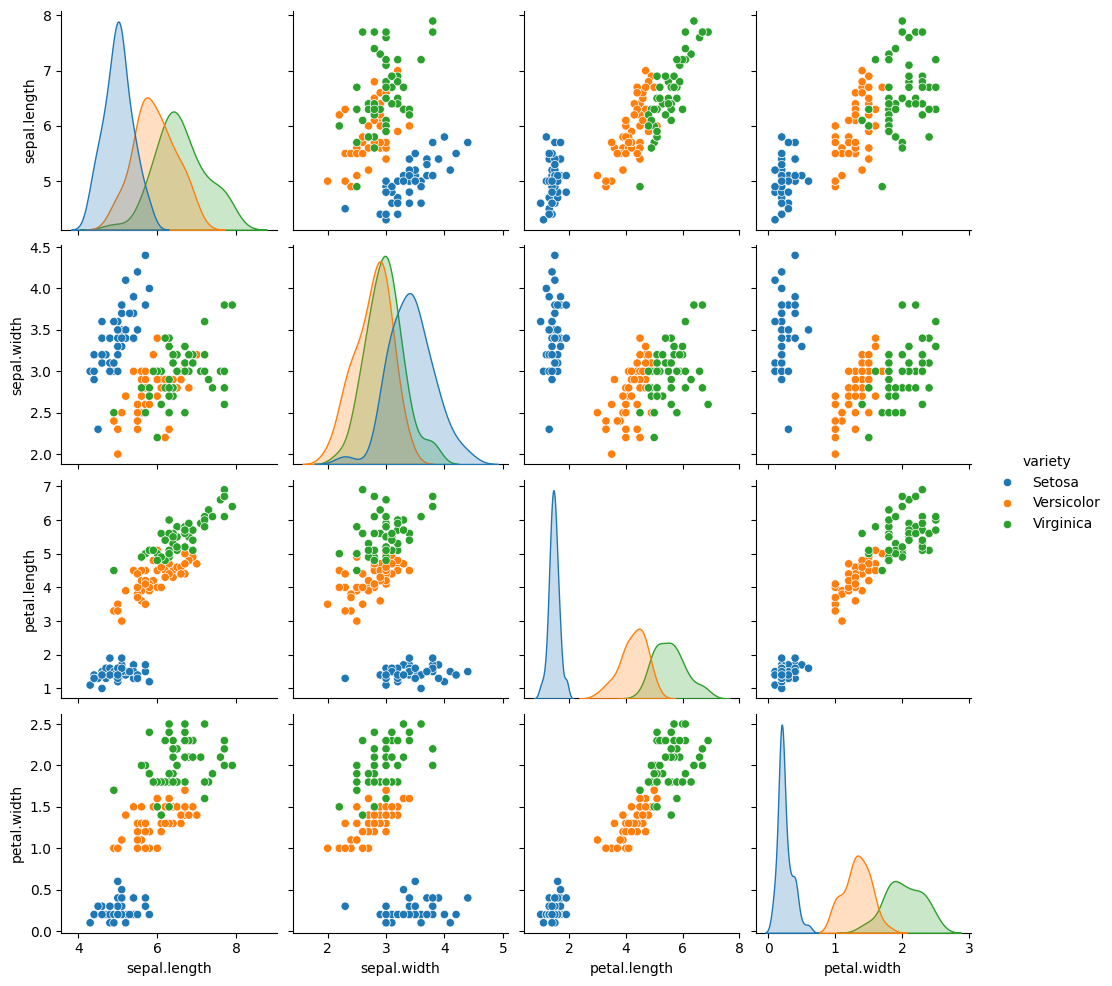

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display info
df_iris.info()

# Descriptive statistics
display(df_iris.describe())

# Missing values
print("\nMissing values per column:\n", df_iris.isnull().sum())

# Target variable distribution
print("\nTarget variable distribution:\n", df_iris['variety'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='variety', data=df_iris)
plt.title('Distribution of Iris Varieties')
plt.xlabel('Variety')
plt.ylabel('Count')
plt.show()

# Analyze relationships between features and target variable using boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_iris.columns[:-1]):  # Exclude 'variety'
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='variety', y=col, data=df_iris)
    plt.title(f'{col} vs. Variety')
plt.tight_layout()
plt.show()

# Analyze relationships using pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df_iris, hue='variety')
plt.show()

# Correlation matrix (excluding the 'variety' column, which is not numeric)
numeric_cols = df_iris.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()
display(correlation_matrix)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df_iris['variety'])

# 2. Select features
X = df_iris.drop('variety', axis=1)

# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the target variable for the test data
y_pred = logreg_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy of the Logistic Regression model: {accuracy}")

Accuracy of the Logistic Regression model: 1.0


In [ ]:
 # 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy

import pandas as pd

try:
    df = pd.read_csv('iris.csv')
    display(df.head())
    display(df.info())
    display(df.describe())
except FileNotFoundError:
    df = None

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64
variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


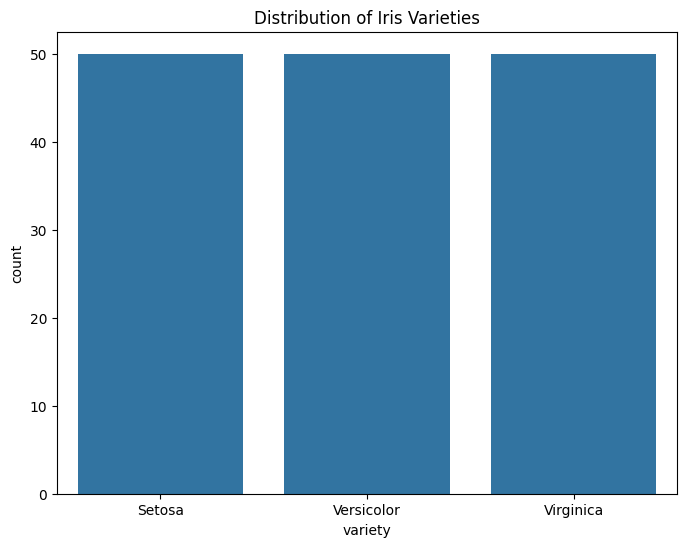

<Figure size 1200x600 with 0 Axes>

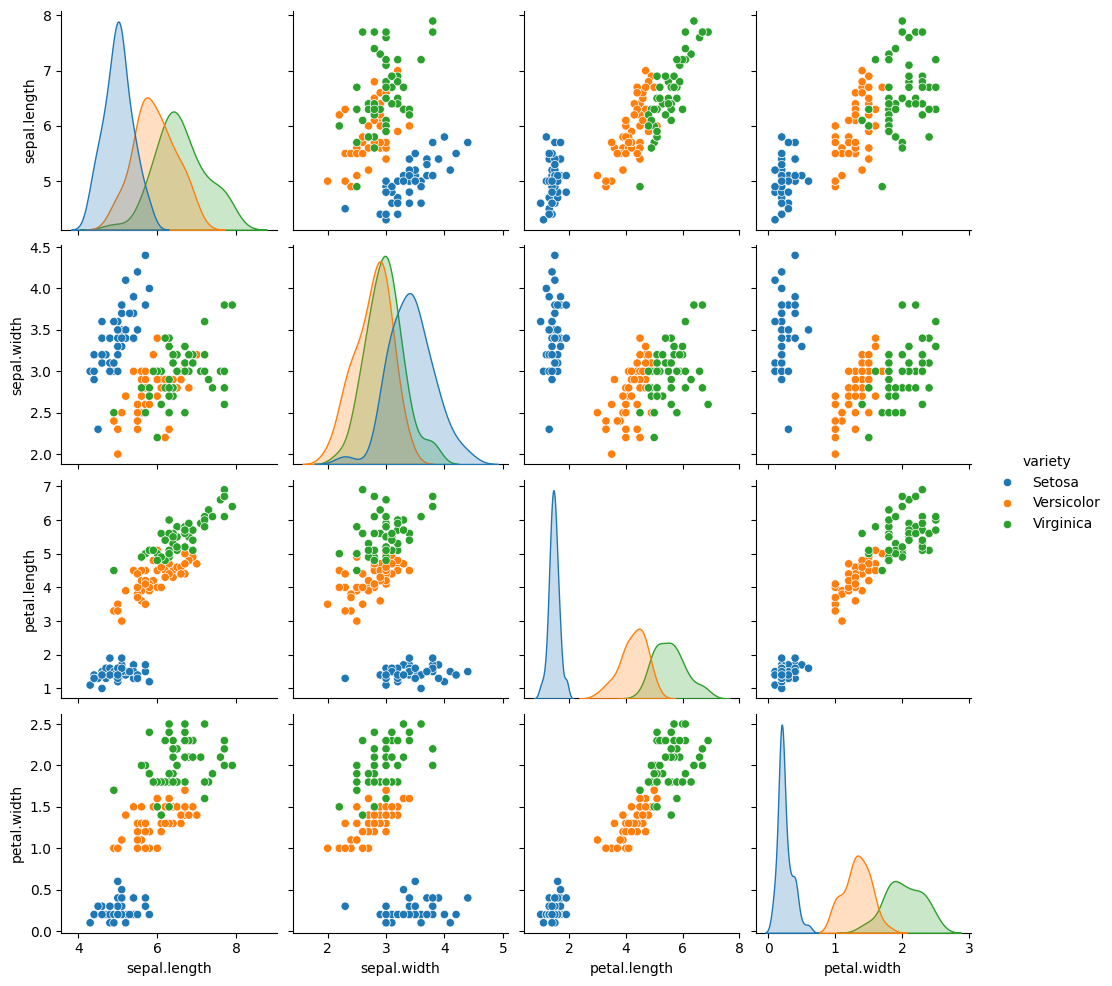

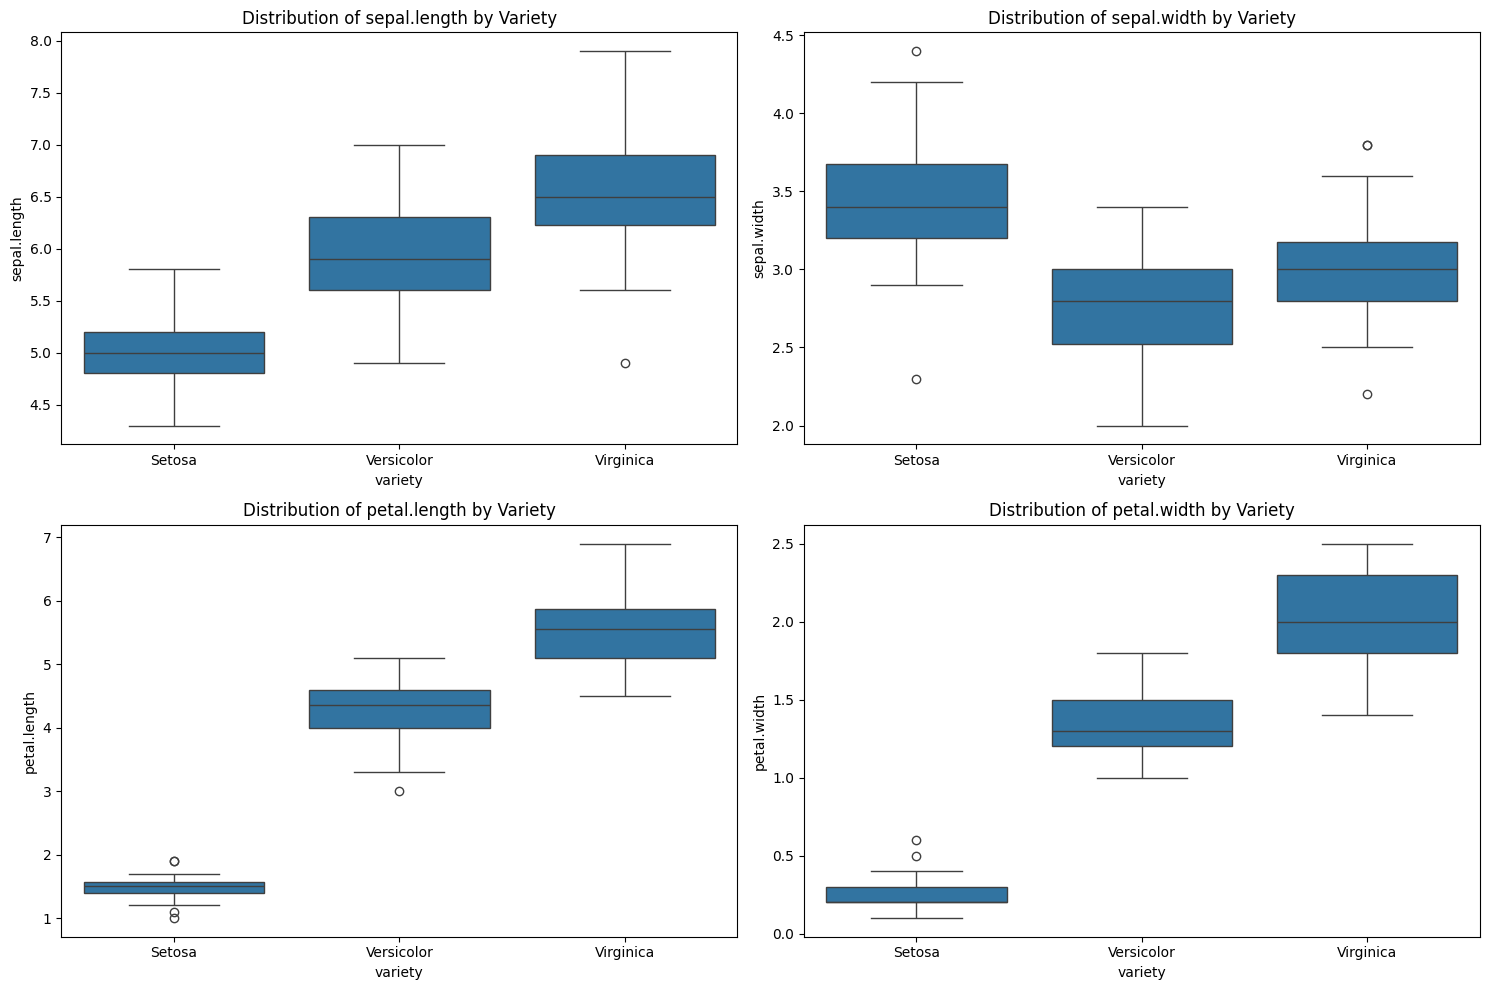

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Analyze the target variable
print(df['variety'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='variety', data=df)
plt.title('Distribution of Iris Varieties')
plt.show()

# Visualize relationships between features and the target variable
plt.figure(figsize=(12, 6))
sns.pairplot(df, hue='variety')
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):  # Iterate over features
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='variety', y=col, data=df)
    plt.title(f'Distribution of {col} by Variety')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('variety', axis=1)
y = df['variety']

# Convert the target variable to numerical labels using Label Encoding
le = LabelEncoder()
y = le.fit_transform(y)

# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (150, 4)
Shape of y: (150,)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from previous steps
# X = df.drop('variety', axis=1)
# y = df['variety']
# ... (any preprocessing steps like LabelEncoder and StandardScaler)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_distributions = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

# Instantiate the Logistic Regression model
logreg = LogisticRegression(max_iter=10000)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_distributions,
    n_iter=100,  # Number of iterations
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Scoring metric
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,  # Set random state for reproducibility
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best estimator
best_logreg = random_search.best_estimator_

print("Best hyperparameters:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)

Best hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'C': np.float64(1.623776739188721)}
Best accuracy: 0.9583333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
350 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the target variable for the test set
y_pred = random_search.best_estimator_.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print("Best Parameters:", random_search.best_params_)
print("Test Accuracy:", accuracy)

Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': np.float64(1.623776739188721)}
Test Accuracy: 1.0


In [ ]:
# 10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy

import pandas as pd

try:
    df_iris = pd.read_csv('iris.csv')
    display(df_iris.head())
except FileNotFoundError:


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Shape of the DataFrame: (150, 5)

Data Types:
 sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

Descriptive Statistics:
        sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Missing Values:
 sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Target Variable Distribution:
 variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


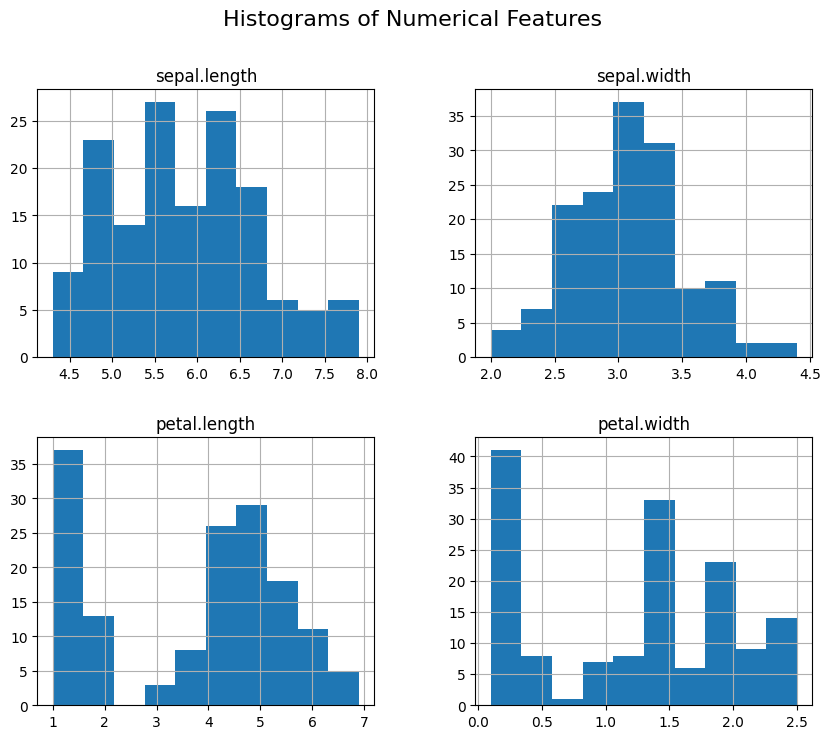

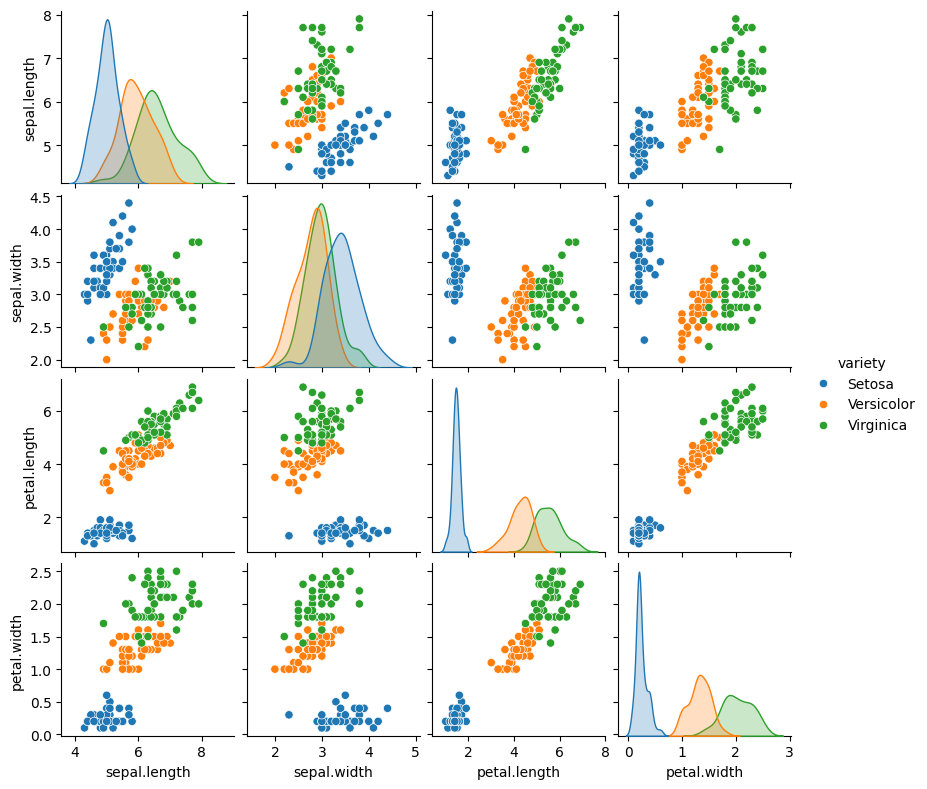

In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df_iris.shape)

# Display data types of each column
print("\nData Types:\n", df_iris.dtypes)

# Summarize descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df_iris.describe())

# Check for missing values
print("\nMissing Values:\n", df_iris.isnull().sum())

# Analyze the distribution of the target variable
print("\nTarget Variable Distribution:\n", df_iris['variety'].value_counts())

import matplotlib.pyplot as plt
# Visualize the distribution of each numerical feature
df_iris.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# Visualize relationships between features using scatter plots
import seaborn as sns
sns.pairplot(df_iris, hue='variety', diag_kind='kde', height=2)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

# Create a LogisticRegression object
logistic_regression = LogisticRegression(max_iter=1000)

# Create a OneVsOneClassifier object
ovo_classifier = OneVsOneClassifier(logistic_regression)

# Train the model
ovo_classifier.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the target variable for the test set
y_pred = ovo_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the OvO Logistic Regression model: {accuracy}")

Accuracy of the OvO Logistic Regression model: 1.0


In [ ]:
# 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification

import pandas as pd

try:
    df_iris = pd.read_csv('iris.csv')
    display(df_iris.head())
except FileNotFoundError:
    print("Error: 'iris.csv' not found. Please ensure the file is in the correct location.")
    df_iris = None
except Exception as e:
    print(f"An error occurred: {e}")
    df_iris = None

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
import pandas as pd

# Select two classes ('Setosa' and 'Versicolor')
df_binary = df_iris[df_iris['variety'].isin(['Setosa', 'Versicolor'])]

# Select two features ('sepal.length' and 'sepal.width') and the 'variety' column
features = ['sepal.length', 'sepal.width']
df_prepared = df_binary[features + ['variety']].copy()

# Encode the 'species' column into numerical labels
species_mapping = {'Setosa': 0, 'Versicolor': 1}
df_prepared['variety'] = df_prepared['variety'].map(species_mapping)

display(df_prepared.head())

,sepal.length,sepal.width,variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_prepared.drop('variety', axis=1)
y = df_prepared['variety']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', max_iter=100, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the target variable for the test data
y_pred = logreg_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[10  0]
 [ 0 10]]


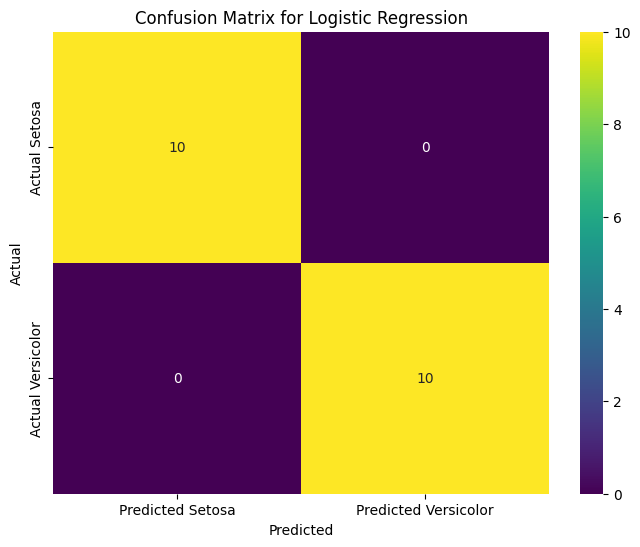

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted Setosa', 'Predicted Versicolor'],
            yticklabels=['Actual Setosa', 'Actual Versicolor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [1]:
# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score

import pandas as pd

try:
    df = pd.read_csv('iris.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'iris.csv' not found. Please ensure the file is in the current directory.")
    df = None # Assign None to df to indicate failure
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Shape of the DataFrame: (150, 5)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Descriptive Statistics:


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Unique values of the target variable:
['Setosa' 'Versicolor' 'Virginica']

Value counts of the target variable:
variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

Histograms of Numerical Features:


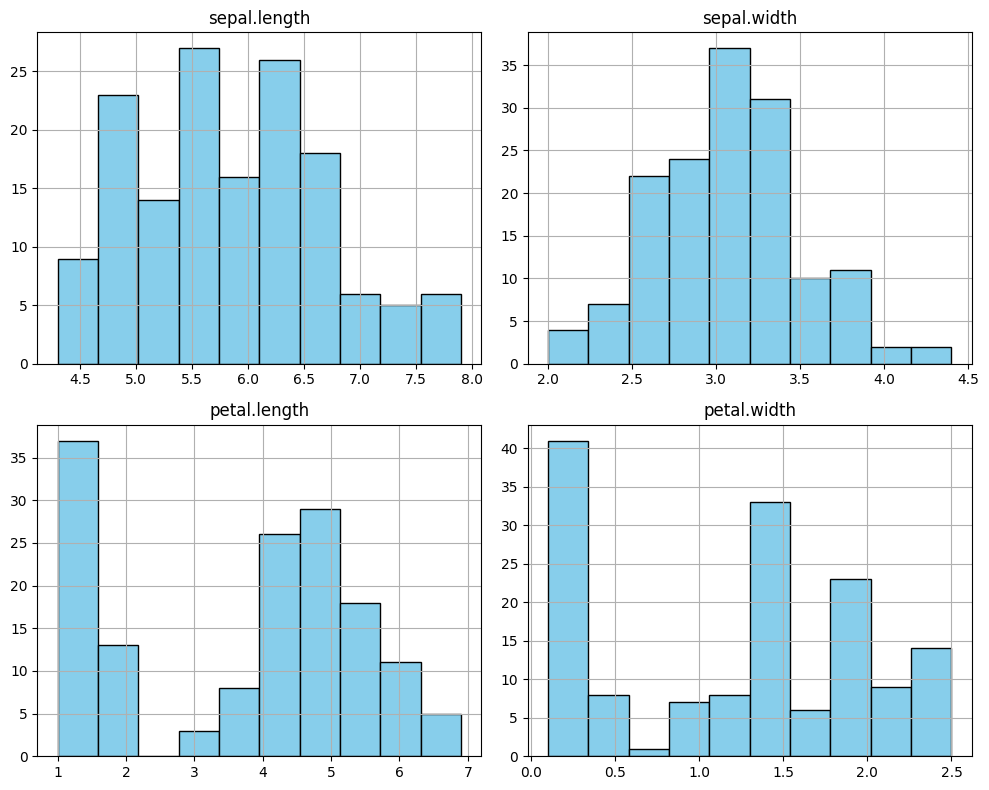


Summary of Findings:


In [2]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics for numerical features
print("\nDescriptive Statistics:")
display(df.describe())

# Examine the unique values of the target variable
print("\nUnique values of the target variable:")
print(df['variety'].unique())
print("\nValue counts of the target variable:")
print(df['variety'].value_counts())

# Visualize the distribution of each numerical feature using histograms
print("\nHistograms of Numerical Features:")
df.hist(figsize=(10, 8), bins=10, color='skyblue', edgecolor='black')
import matplotlib.pyplot as plt
plt.tight_layout()
plt.show()

print("\nSummary of Findings:")
# Summarize findings here after the plots are generated.

**Reasoning**:
I need to complete the subtask by summarizing the findings from the previous code execution.



In [3]:
print("Summary of Findings:")
print("The Iris dataset has 150 samples and 5 columns. There are no missing values.")
print("The 'variety' column is the target variable, with three unique values: 'Setosa', 'Versicolor', and 'Virginica', each having 50 samples.")
print("The numerical features show some variation in their distributions, as seen in the histograms.  Further analysis may reveal outliers or other patterns.")

Summary of Findings:
The Iris dataset has 150 samples and 5 columns. There are no missing values.
The 'variety' column is the target variable, with three unique values: 'Setosa', 'Versicolor', and 'Virginica', each having 50 samples.
The numerical features show some variation in their distributions, as seen in the histograms.  Further analysis may reveal outliers or other patterns.


In [4]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df['variety'])

# Separate features and target
X = df.drop('variety', axis=1)

# Ensure y is a NumPy array
y = np.array(y)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 values of y:", y[:5])
display(X.head())

Shape of X: (150, 4)
Shape of y: (150,)
First 5 values of y: [0 0 0 0 0]


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', max_iter=100)

# Train the model
logreg_model.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Model coefficients:", logreg_model.coef_)
print("Model intercept:", logreg_model.intercept_)

Model coefficients: [[ 0.39135089  1.4018962  -2.15685241 -0.97511015]
 [ 0.38185283 -1.50277664  0.57757492 -1.35725126]
 [-1.61846732 -1.32873458  2.31939683  2.25540419]]
Model intercept: [ 0.26697924  0.94987525 -1.14258028]


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.9696969696969697
Recall: 0.9666666666666667
F1-score: 0.9665831244778612


In [1]:
# 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance

import pandas as pd

try:
    df = pd.read_csv('iris.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'iris.csv' not found.")
    df = None  # or handle the error appropriately
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


(150, 5)


Class Distribution:
 variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


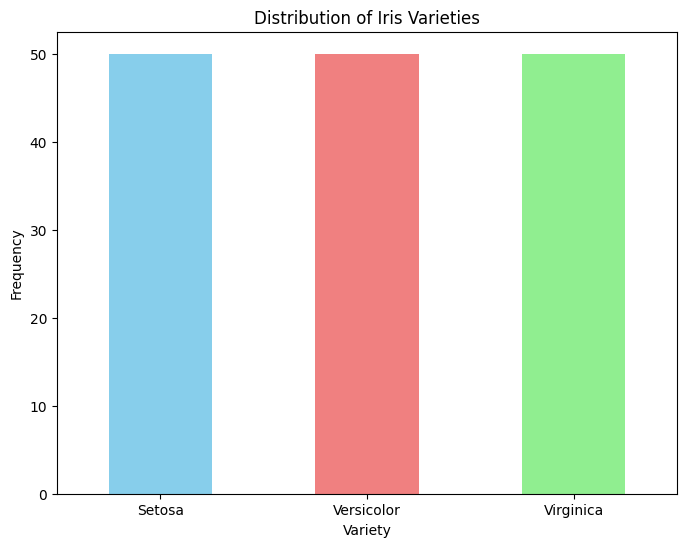


Descriptive Statistics of Numerical Features:
        sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Relationship between features and target variable:

sepal.length:
             mean  median  min  max
variety                            
Setosa      5.006     5.0  4.3  5.8
Versicolor  5.936     5.9  4.9  7.0
Virginica   6.588     6.5  4.9  7.9

sepal.width:
             mean  median  min  max
variety                            
Setosa      3.428     3.4  2.3  4.4
Versicolor  2.770     2.8  2.0  3.4
Virgini

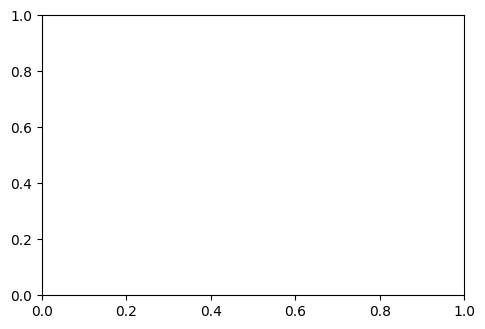

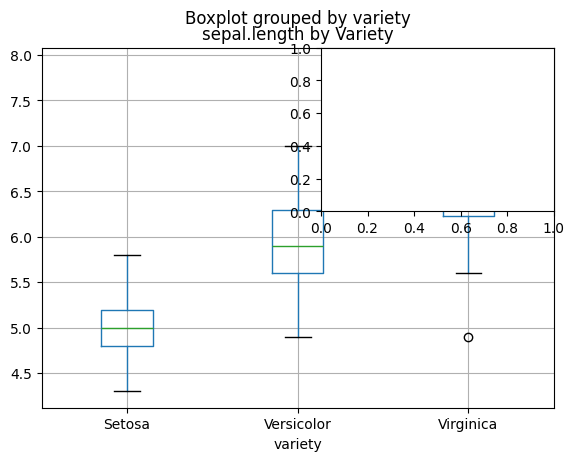

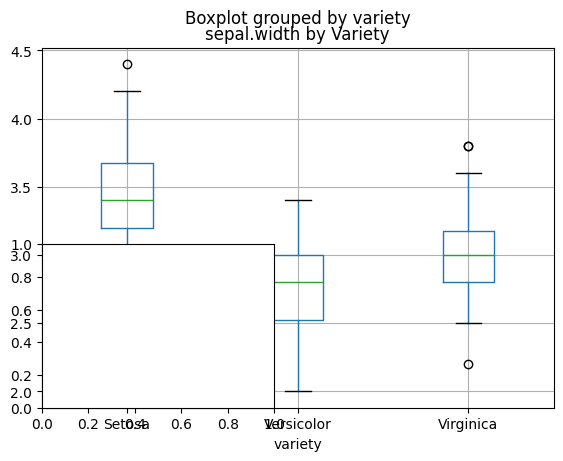

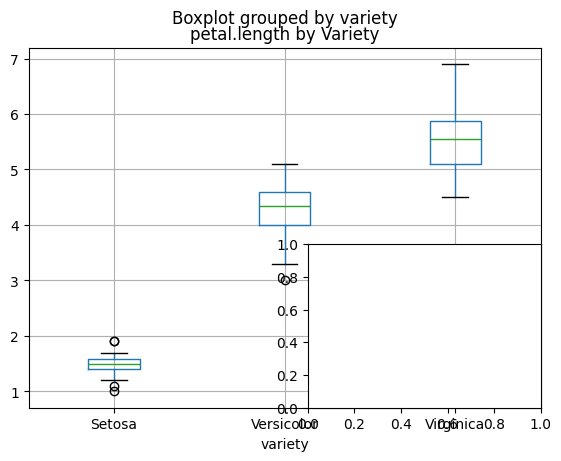

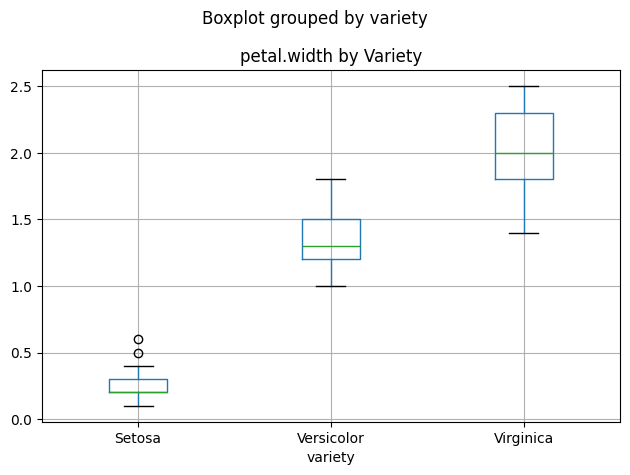


Missing Values:
 sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Data Types:
 sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

Summary:
The dataset appears to be balanced.


In [2]:
# Check class distribution
variety_counts = df['variety'].value_counts()
print("Class Distribution:\n", variety_counts)

# Visualize class distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
variety_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Iris Varieties')
plt.xlabel('Variety')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Describe numerical features
print("\nDescriptive Statistics of Numerical Features:\n", df.describe())

# Analyze feature-target relationships
print("\nRelationship between features and target variable:")
for col in ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']:
    print(f"\n{col}:")
    print(df.groupby('variety')[col].agg(['mean', 'median', 'min', 'max']))

# Visualize feature-target relationships
plt.figure(figsize=(12, 8))
for i, col in enumerate(['sepal.length', 'sepal.width', 'petal.length', 'petal.width']):
    plt.subplot(2, 2, i + 1)
    df.boxplot(column=col, by='variety')
    plt.title(f'{col} by Variety')
plt.tight_layout()
plt.show()

# Check for missing values and data types
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

print("\nSummary:")
if variety_counts.min() / variety_counts.max() < 0.7:
    print("The dataset appears to be imbalanced.")
else:
    print("The dataset appears to be balanced.")


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 1. Feature Selection and Target Encoding
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = df['variety'].astype('category').cat.codes

# 2. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Class Weight Calculation
class_weights = compute_class_weight(
    class_weight='balanced', classes=np.unique(y_train), y=y_train
)
class_weights_dict = dict(enumerate(class_weights))
print(f"class weights: {class_weights_dict}")

# 4. Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0)}


In [4]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model with class weights
logreg_model = LogisticRegression(class_weight=class_weights_dict, solver='liblinear', max_iter=100)

# Train the model
logreg_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: np.float64(1.0), 1: np.float64(1.0),
                                 2: np.float64(1.0)},
                   solver='liblinear')

Accuracy: 0.8333333333333334
Precision: 0.8498168498168498
Recall: 0.8333333333333334
F1-score: 0.8294970161977834
AUC-ROC: 0.9666666666666668


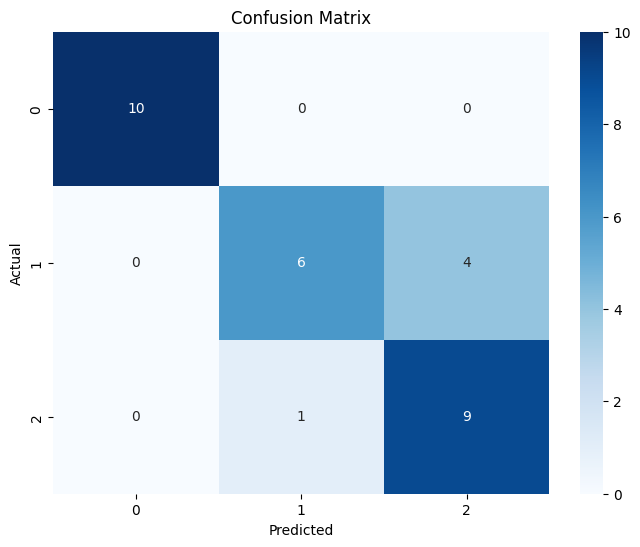

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      0.60      0.71        10
           2       0.69      0.90      0.78        10

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



In [5]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Attempt AUC-ROC calculation (may require probabilities for multiclass)
try:
    y_prob = logreg_model.predict_proba(X_test)
    auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr') # Use 'ovr' for multiclass
except AttributeError:
    print("AUC-ROC score unavailable for this model type or configuration.")
    auc_roc = None

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
if auc_roc is not None:
    print(f"AUC-ROC: {auc_roc}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))

In [1]:
# 14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance

import pandas as pd

try:
    df = pd.read_csv('iris.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'iris.csv' not found. Please ensure the file is in the correct location.")
    df = None # Indicate that the DataFrame was not successfully created


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


(150, 5)


              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000


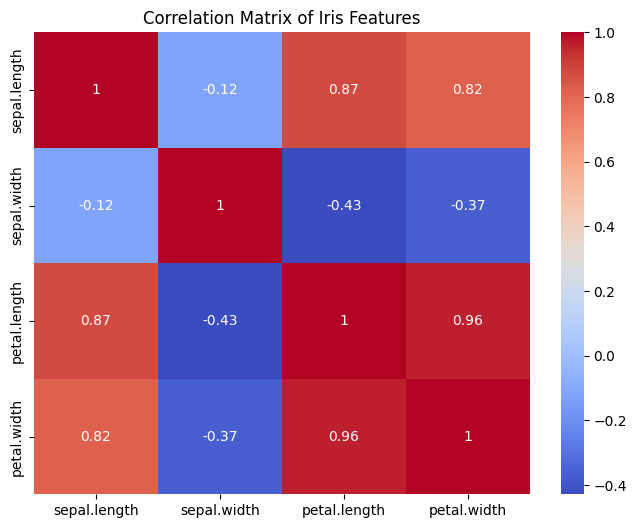

In [3]:
# Correlation matrix and heatmap (excluding 'variety')
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
print(corr_matrix)
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Features')
plt.show()

In [4]:
# Check for missing values
print(df.isnull().sum())

# No missing values found in the previous step, so we skip imputation.

# Check for and remove duplicate rows
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicate rows removed. New shape: {df.shape}")
else:
    print("No duplicate rows found.")

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Number of duplicate rows: 1
Duplicate rows removed. New shape: (149, 5)


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df['variety'])

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


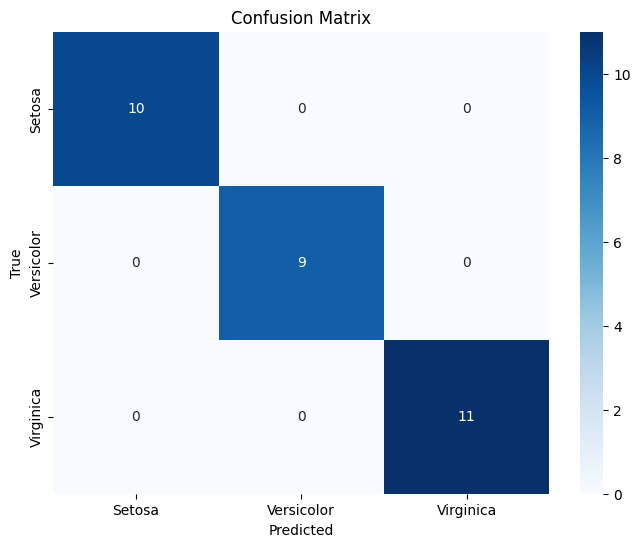

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [1]:
# 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling

import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('iris.csv')
    # Display some info
    display(df.head())
    print(df.shape)
    print(df.info())
except FileNotFoundError:
    print("Error: 'iris.csv' not found.")


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64
variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

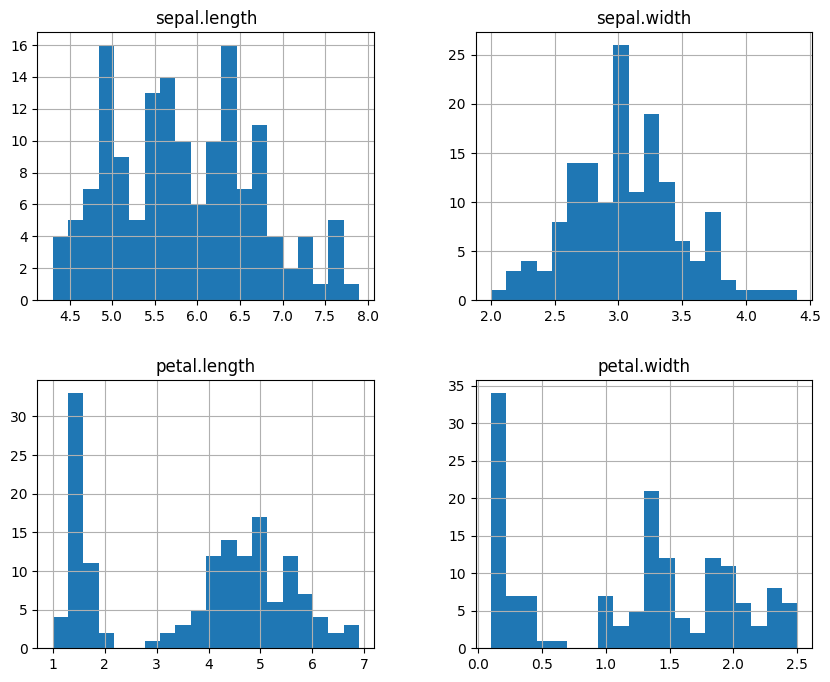

<Figure size 1200x800 with 0 Axes>

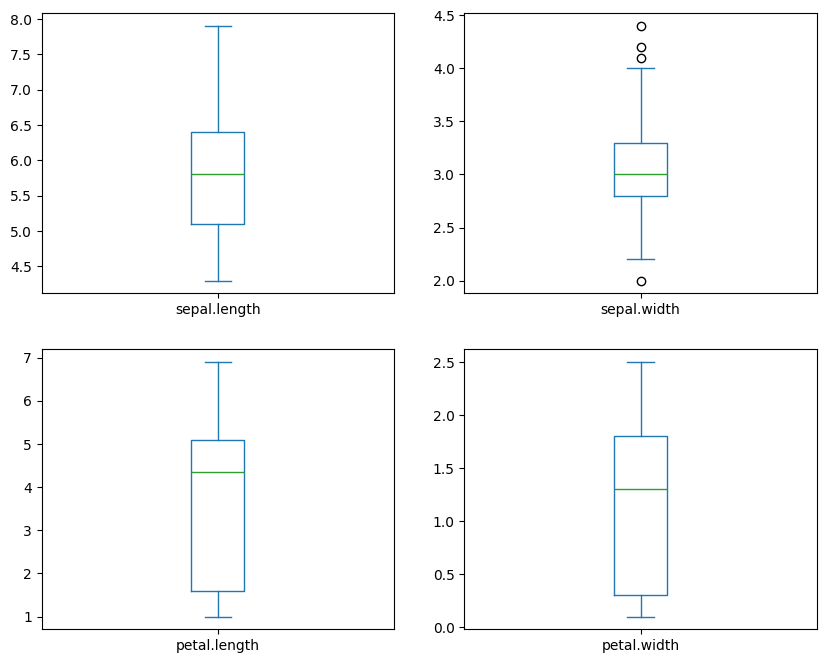

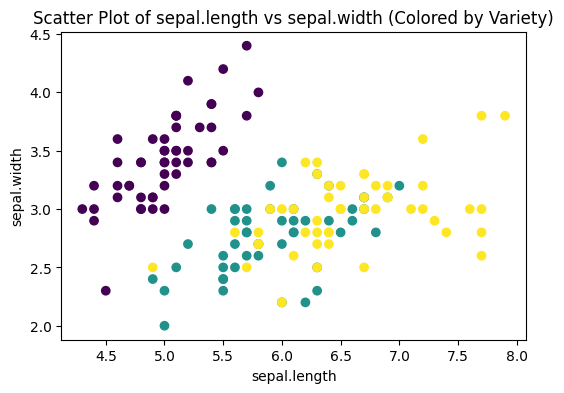

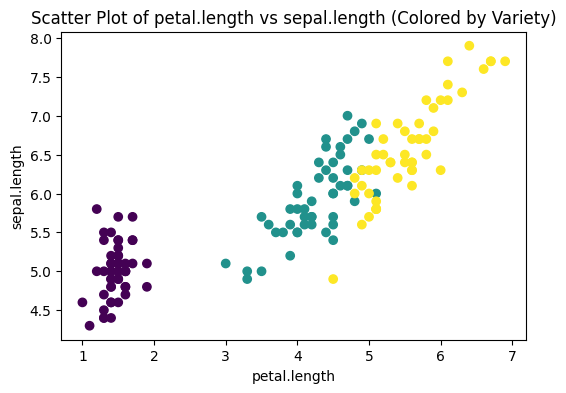

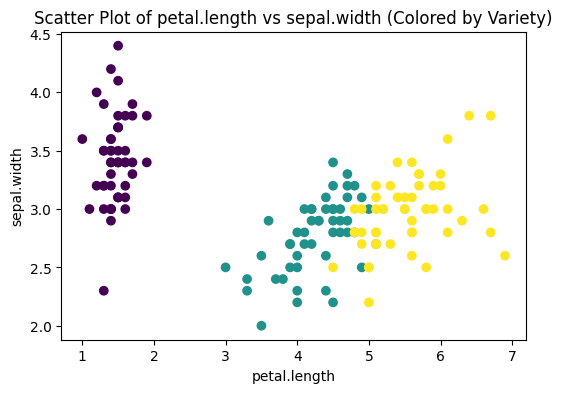

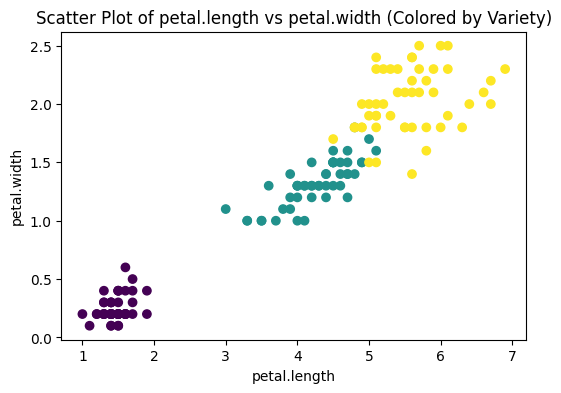

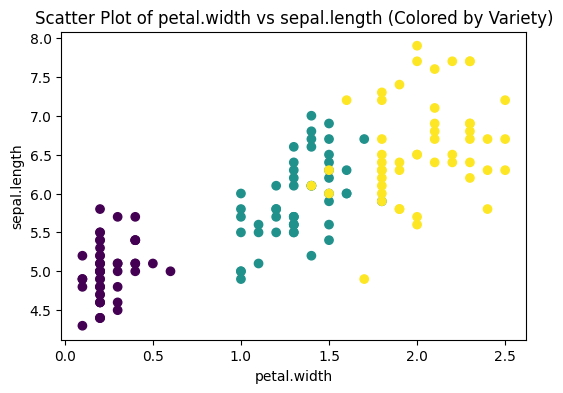

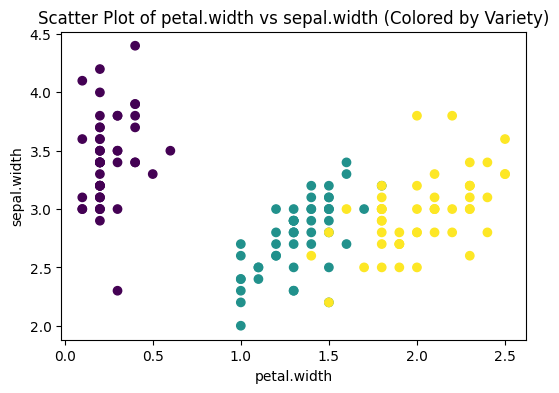

In [2]:
# Check data types
print(df.dtypes)

# Descriptive statistics
print(df.describe())

# Missing values
print(df.isnull().sum())

# Target variable distribution
print(df['variety'].value_counts())

# Visualizations
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# Histograms for numerical features
df.hist(figsize=(10,8), bins=20)

plt.figure(figsize=(12, 8))
# Box plots for numerical features
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,8))

# Scatter plots for pairs of numerical features, colored by variety
for col1 in ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']:
    for col2 in ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']:
        if col1 != col2 and col2 > col1:
            plt.figure(figsize=(6, 4))
            plt.scatter(df[col1], df[col2], c=pd.factorize(df['variety'])[0])
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f'Scatter Plot of {col1} vs {col2} (Colored by Variety)')
            plt.show()

In [7]:
from sklearn.metrics import accuracy_score

# Predict on the scaled test data
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print the accuracy
print(f"Accuracy of Logistic Regression model on scaled data: {accuracy_scaled}")

Accuracy of Logistic Regression model on scaled data: 0.9777777777777777


In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model_unscaled = LogisticRegression()
model_unscaled.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model with increased max_iter
model_unscaled = LogisticRegression(max_iter=1000) # Increased max_iter
model_unscaled.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
from sklearn.metrics import accuracy_score

# Predict the target variable for the test data
y_pred_unscaled = model_unscaled.predict(X_test)

# Calculate the accuracy score
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Print the accuracy
print(f"Accuracy of Logistic Regression model on unscaled data: {accuracy_unscaled}")

Accuracy of Logistic Regression model on unscaled data: 1.0


In [1]:
# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score

import pandas as pd

try:
    df = pd.read_csv('iris.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'iris.csv' not found.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'iris.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'iris.csv'. Check the file format.")
    df = None

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


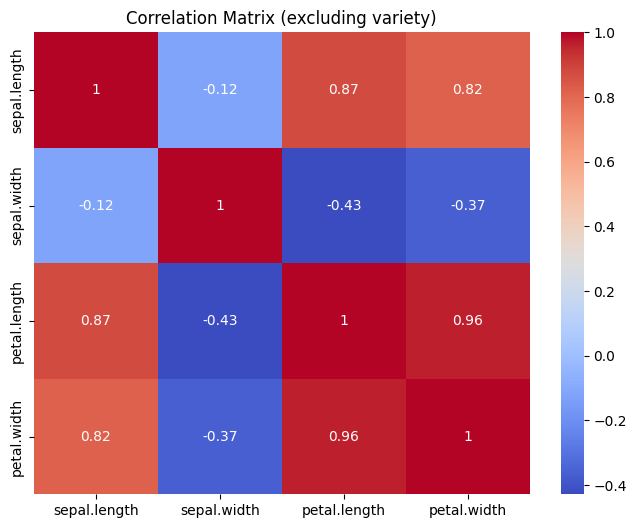

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Analysis (excluding 'variety')
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('variety', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (excluding variety)')
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target variable
le = LabelEncoder()
df['variety_encoded'] = le.fit_transform(df['variety'])
df = df.drop('variety', axis=1)

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,sepal.length,sepal.width,petal.length,petal.width,variety_encoded
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')

# Train the model
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [7]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Predict probabilities for the test set
y_prob = logreg_model.predict_proba(X_test)

# For multi-class classification, ROC AUC score needs to be calculated for each class
roc_auc_scores = []

for i in range(3):  # Iterate through each of the 3 classes
    y_test_binary = (np.array(y_test) == i).astype(int)  # Create binary label for the current class
    y_prob_binary = y_prob[:, i]  # Probability of the current class

    roc_auc = roc_auc_score(y_test_binary, y_prob_binary)
    roc_auc_scores.append(roc_auc)


print("ROC AUC scores for each class:")
for i, roc_auc in enumerate(roc_auc_scores):
    print(f"Class {i}: {roc_auc}")

# Calculate the average ROC AUC score across all classes
average_roc_auc = np.mean(roc_auc_scores)
print(f"\nAverage ROC AUC score: {average_roc_auc}")

ROC AUC scores for each class:
Class 0: 1.0
Class 1: 0.995
Class 2: 0.995

Average ROC AUC score: 0.9966666666666667


In [1]:
# 17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy

import pandas as pd

try:
    df_iris = pd.read_csv('iris.csv')
    display(df_iris.head())
except FileNotFoundError:
    print("Error: 'iris.csv' not found. Please ensure the file exists in the current directory.")
    df_iris = None # Set to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse 'iris.csv'. Please ensure the file is a valid CSV file.")
    df_iris = None

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
# Examine Data Shape and Structure
print("Data Shape:", df_iris.shape)
display(df_iris.head())
display(df_iris.tail())

# Check Data Types
print("\nData Types:")
print(df_iris.info())

# Identify Missing Values
print("\nMissing Values:")
print(df_iris.isnull().sum())

# Summarize Numerical Features
print("\nDescriptive Statistics for Numerical Features:")
print(df_iris.describe())

# Analyze Target Variable
print("\nTarget Variable Distribution:")
print(df_iris['variety'].value_counts())

Data Shape: (150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica



Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing Values:
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Descriptive Statistics for Numerical Features:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.3000

In [3]:
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target variable (y)
X = df_iris.drop('variety', axis=1)
y = df_iris['variety']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Display the mapping between original and encoded labels
print("Label Mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

# Confirm the shapes
print("\nShape of X:", X.shape)
print("Shape of y_encoded:", y_encoded.shape)

Label Mapping:
Setosa: 0
Versicolor: 1
Virginica: 2

Shape of X: (150, 4)
Shape of y_encoded: (150,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(C=0.5)
logreg_model.fit(X_train, y_train)

LogisticRegression(C=0.5)

In [6]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

Accuracy of the Logistic Regression model: 1.0


In [1]:
# 18. Write a Python program to train Logistic Regression and identify important features based on model coefficients

import pandas as pd

try:
    df_iris = pd.read_csv('iris.csv')
    display(df_iris.head())
except FileNotFoundError:
except Exception as e:


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Shape of the DataFrame: (150, 6)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal.length     150 non-null    float64
 1   sepal.width      150 non-null    float64
 2   petal.length     150 non-null    float64
 3   petal.width      150 non-null    float64
 4   variety          150 non-null    object 
 5   variety_encoded  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Descriptive Statistics:
       sepal.length  sepal.width  petal.length  petal.width  variety_encoded
count    150.000000   150.000000    150.000000   150.000000       150.000000
mean       5.843333     3.057333      3.758000     1.199333         1.000000
std        0.828066     0.435866      1.765298     0.762238         0.819232
min        4.300000     2.000000      1.000000     0.100000         0.000000
25%  

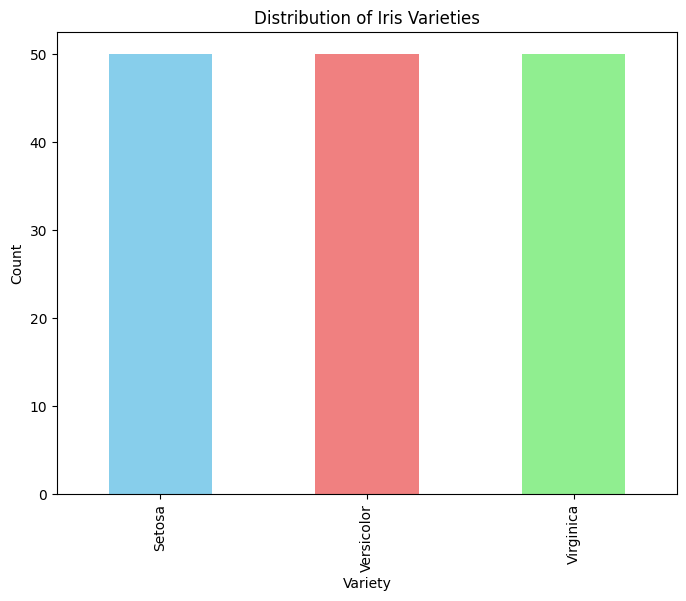


Pairwise Relationships (Correlation Matrix):


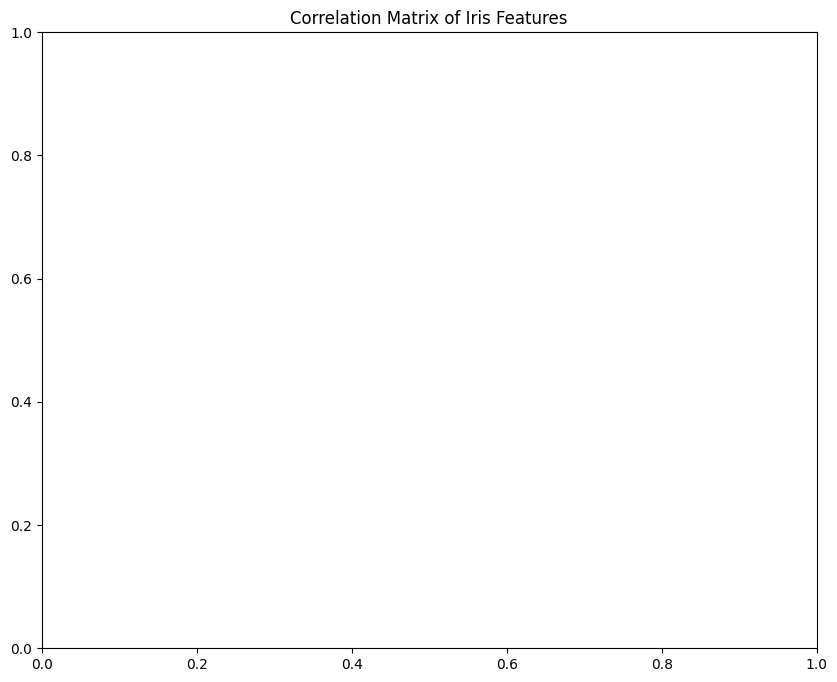

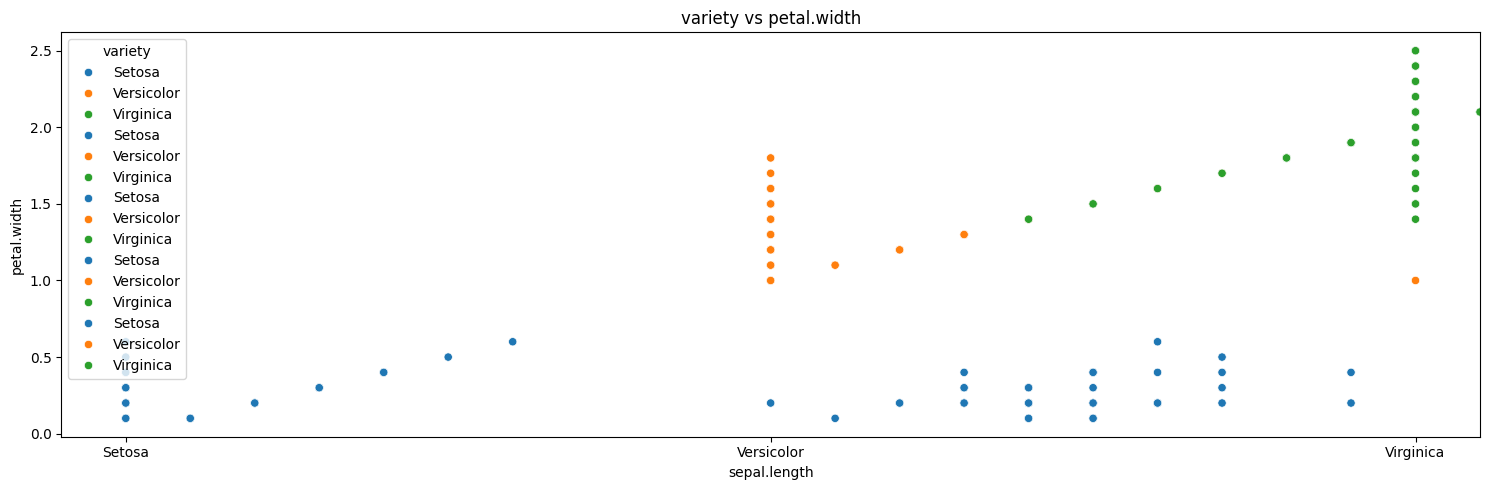

In [10]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df_iris.shape)

# Display data types of each column
print("\nData Types:")
print(df_iris.info())

# Summarize descriptive statistics of numerical features
print("\nDescriptive Statistics:")
print(df_iris.describe())

# Check for missing values
print("\nMissing Values:")
print(df_iris.isnull().sum())

# Analyze the distribution of the target variable
print("\nTarget Variable Distribution:")
print(df_iris['variety'].value_counts())

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df_iris['variety'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Iris Varieties')
plt.xlabel('Variety')
plt.ylabel('Count')
plt.show()


# Examine pairwise relationships between features
print("\nPairwise Relationships (Correlation Matrix):")

import seaborn as sns
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix of Iris Features')
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(df_iris.columns[:-1]):
    sns.scatterplot(data=df_iris, x=col, y='petal.width', hue='variety')
    plt.title(f'{col} vs petal.width')
plt.tight_layout()
plt.show()


Pairwise Relationships (Correlation Matrix, excluding 'variety'):
              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000


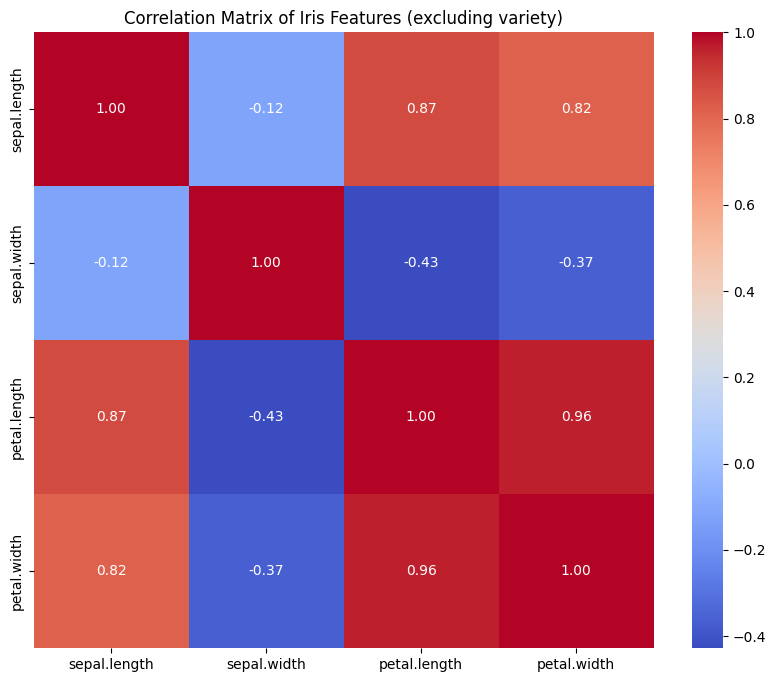

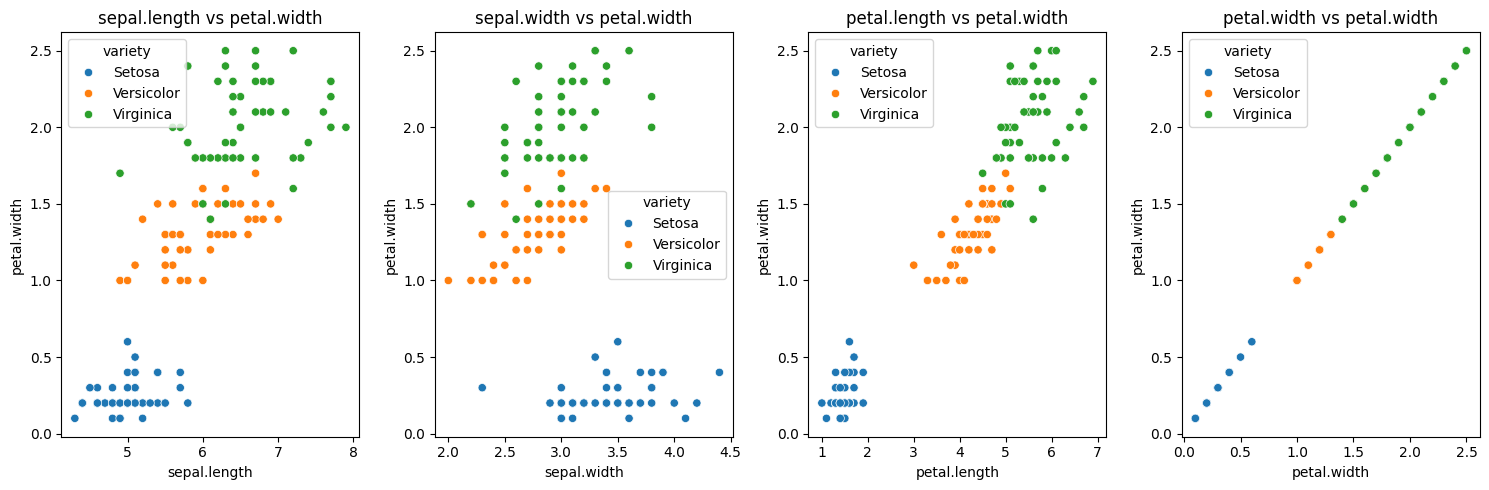

In [3]:
# Recalculate the correlation matrix, excluding the 'variety' column
print("\nPairwise Relationships (Correlation Matrix, excluding 'variety'):")
correlation_matrix = df_iris.drop('variety', axis=1).corr()
print(correlation_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Features (excluding variety)')
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(df_iris.columns[:-1]):
    plt.subplot(1, 4, i + 1)
    sns.scatterplot(data=df_iris, x=col, y='petal.width', hue='variety')
    plt.title(f'{col} vs petal.width')
plt.tight_layout()
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



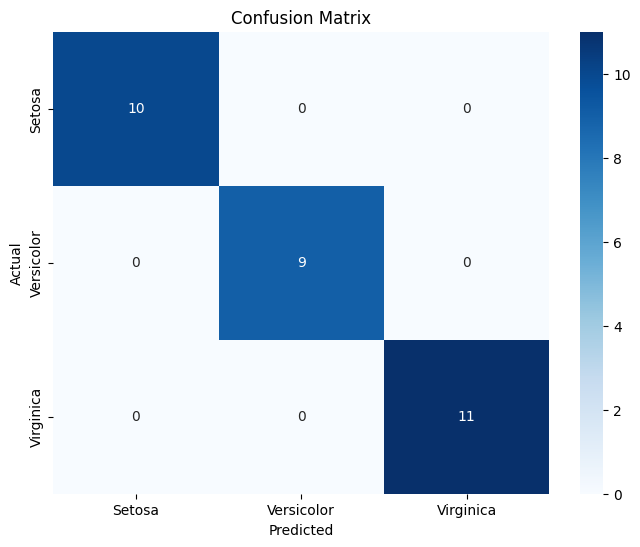

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Calculate and print the classification report
print(classification_report(y_test, y_pred))

# Calculate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
import pandas as pd
import numpy as np

# Access the coefficients of the trained model
coefficients = logreg_model.coef_

# Create a DataFrame to store the coefficients
feature_names = X_train.columns.values
df_coefficients = pd.DataFrame(coefficients, columns=feature_names)

# Display the coefficients for each class
display(df_coefficients)

# Identify important features for each class
for i in range(len(df_coefficients)):
    print(f"\nClass {i}:")
    # Sort the coefficients by absolute value in descending order
    sorted_coefficients = df_coefficients.iloc[i].abs().sort_values(ascending=False)
    print(sorted_coefficients)


,sepal.length,sepal.width,petal.length,petal.width
0,0.371123,1.409712,-2.152101,-0.954742
1,0.494005,-1.588971,0.437170,-1.111878
2,-1.558953,-1.588934,2.398746,2.155562



Class 0:
petal.length    2.152101
sepal.width     1.409712
petal.width     0.954742
sepal.length    0.371123
Name: 0, dtype: float64

Class 1:
sepal.width     1.588971
petal.width     1.111878
sepal.length    0.494005
petal.length    0.437170
Name: 1, dtype: float64

Class 2:
petal.length    2.398746
petal.width     2.155562
sepal.width     1.588934
sepal.length    1.558953
Name: 2, dtype: float64


In [1]:
# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score

import pandas as pd

try:
    df_iris = pd.read_csv('iris.csv')
    display(df_iris.head())
    print(df_iris.shape)
except FileNotFoundError:
    print("Error: 'iris.csv' not found. Please ensure the file is in the correct location and accessible.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


(150, 5)


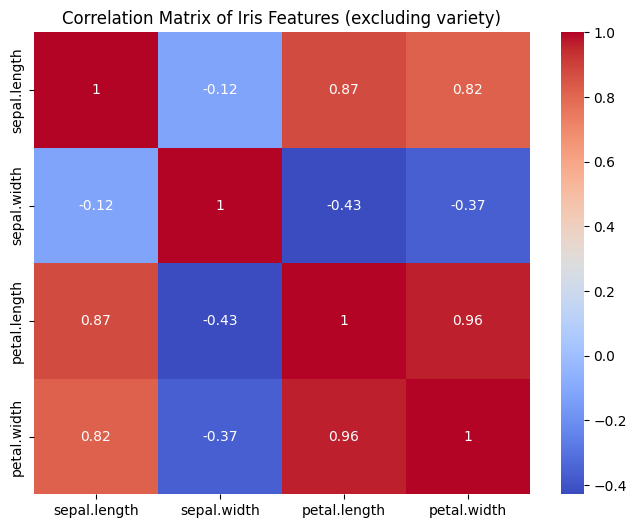

In [3]:
# Correlation Analysis (excluding 'variety' column)
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df_iris.drop('variety', axis=1)
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Features (excluding variety)')
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df_iris['variety'])

# Separate features and target
X = df_iris.drop('variety', axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
from sklearn.metrics import cohen_kappa_score

# Predict the labels for the test set
y_pred = logreg_model.predict(X_test)

# Calculate the Cohen's Kappa score
kappa_score = cohen_kappa_score(y_test, y_pred)

# Print the Cohen's Kappa score
print(f"Cohen's Kappa Score: {kappa_score}")

Cohen's Kappa Score: 0.9


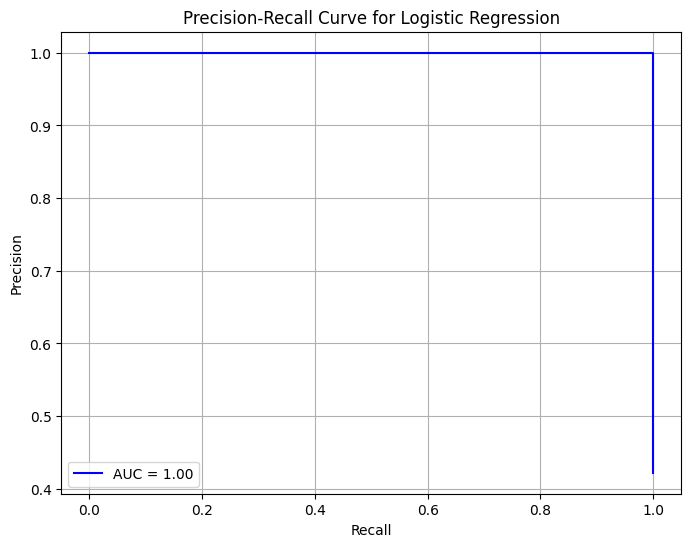

In [8]:
# 20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Convert to binary classification (Setosa vs. others)
y = (y == 0).astype(int)  # Setosa is 0, others are 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the area under the precision-recall curve (AUC)
auc_score = auc(recall, precision)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'AUC = {auc_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [9]:
# 21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a list of solvers to compare
solvers = ['liblinear', 'saga', 'lbfgs']

# Train and evaluate Logistic Regression with each solver
for solver in solvers:
    # Create a Logistic Regression model with the current solver
    model = LogisticRegression(solver=solver, max_iter=1000)  # Increased max_iter for convergence

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy for the current solver
    print(f"Accuracy with solver '{solver}': {accuracy}")

Accuracy with solver 'liblinear': 0.9777777777777777
Accuracy with solver 'saga': 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy with solver 'lbfgs': 1.0


In [10]:
# 22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Consider only two classes for binary classification (Setosa vs. others)
y = (y == 0).astype(int)  # Setosa is 0, others are 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)

# Print the MCC
print(f"Matthews Correlation Coefficient (MCC): {mcc}")

Matthews Correlation Coefficient (MCC): 1.0


In [11]:
# 23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression on raw data
model_raw = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression on standardized data
model_scaled = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Compare accuracies
print(f"Accuracy on raw data: {accuracy_raw}")
print(f"Accuracy on standardized data: {accuracy_scaled}")

Accuracy on raw data: 1.0
Accuracy on standardized data: 1.0


In [12]:
# 24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best C value and the corresponding accuracy
best_C = grid_search.best_params_['C']
best_accuracy = grid_search.best_score_

# Print the best C value and accuracy
print(f"Best C: {best_C}")
print(f"Best Accuracy: {best_accuracy}")

# Evaluate the model with the best C on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best C: {test_accuracy}")

Best C: 1
Best Accuracy: 0.9619047619047618
Test Accuracy with Best C: 1.0


In [13]:
# 25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Save the trained model using joblib
filename = 'logistic_regression_model.joblib'
joblib.dump(model, filename)

# Load the saved model
loaded_model = joblib.load(filename)

# Make predictions on the test data using the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate the accuracy of the loaded model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the loaded model: {accuracy}")

Accuracy of the loaded model: 1.0
